# Métodos de Suavización Exponencial

````{admonition} Introducción
:class: tip
- El presente capítulo trata del ***suavizado de datos en la señal de series temporales***. El capítulo está organizado como sigue:

    - ***Introducción al suavizado de series temporales***

    - ***Suavizado exponencial de primer orden***

    - ***Suavizado exponencial de segundo orden***

    - ***Suavizado exponencial de orden superior***
````

# Análisis

## Introducción al suavizado de series temporales

- Los datos de las series temporales se componen de ***señal y ruido***, donde la ***señal captura la dinámica intrínseca del proceso***; sin embargo, el ***ruido representa el componente no modelado de la señal o error aleatorio no correlacionado***, el cual en diferentes tiempos es ***estadísticamente independiente***. 

- La dinámica intrínseca de una señal de serie temporal puede ser tan simple como ***la media del proceso*** o puede ser una ***forma funcional compleja*** dentro de las observaciones, como se representa aquí:

    $$
    \\[1mm]
    y_{t}=f(t, \boldsymbol{\beta})+\varepsilon_{t},\quad\text{para}\quad i=1,2,3,\dots,T,
$$
    
    donde $y_{t}$ representa las observaciones, $\boldsymbol{\beta}$ es un vector de parámetros desconocidos, y $\varepsilon_{t}$ es el ***error aleatorio no correlacionado***, usualmente con media 0 y desviación 1.

````{figure} ./figures/signal_noise.png
:align: center
:name: signal_noise_fig
:scale: 80

````

- $f(t, \boldsymbol{\beta})$ ***denota la forma funcional de la señal***. Un ejemplo puede ser una constante (***media***) como forma funcional:

$$
    y_{t}=\mu+\varepsilon_{t}
$$

- Dado que $\varepsilon_{t}$ es ***ruido blanco***, este enfoque basado en el suavizado ayuda a ***separar la forma funcional intrínseca del ruido aleatorio, cancelándolo***. 

- Los métodos predictivos de suavización pueden considerarse como ***filtros*** que toman datos de entrada y ***separan los componentes de tendencia y de ruido***, como se muestra en la {numref}`fig1_chapter2`

```{figure} ./figures/fig1_chapter2.png
:name: fig1_chapter2
:align: center

Separación de componentes de tendencia y ruido.
```

- Un ***proceso constante*** puede ser suavizado reemplazando la observación actual con el mejor estimador para $\mu$. Usando el criterio de ***mínimos cuadrados***, definimos la ***suma de cuadrados de los errores*** $SS_{E}$, para el proceso constante como 

$$
SS_{E}=\sum_{t=1}^{T}(y_{t}-\mu)^{2}.
$$

- La estimación por mínimos cuadrados de $\mu$ puede ser calculada ***derivando*** $SS_{E}$ ***con respecto a*** $\mu$ el igualar a cero (***verifíquelo***). Esto entrega

  $$
  \hat{\mu}=\frac{1}{T}\sum_{t=1}^{T}y_{t},
  $$(constant_process_ols)

  donde $\hat{\mu}$ ***es la estimación por mínimos cuadrados*** de $\mu$.

- La Ecuación {eq}`constant_process_ols` muestra que la ***estimación por mínimos cuadrados de*** $\mu$, es, en efecto, el promedio de las observaciones hasta el tiempo $T$.

````{admonition} Observación
:class: tip

- El principal problema con el suavizador de la Ecuación {eq}`constant_process_ols` es que ***reacciona lentamente a procesos de cambios***, debido a que ***acumula más y más puntos de datos ganando algún tipo de inercia***. La solución más obvia es de alguna forma descontar datos más antiguos. 
- Una solución común es usar la ***media móvil simple*** definida por

$$
M_{T}= \frac{y_{T}+y_{T-1}+\cdots+y_{T-N+1}}{N}=\frac{1}{N}\sum_{t=T-N+1}^{N}y_{t}.
$$(simple_moving_avg)

- Una media ***reaccionará más rápido a cambios si*** $N$ ***es pequeño***. Dado que para observaciones no correlacionadas con varianza constante $\sigma^{2}$ se tiene que

    $$
    \text{Var}(M_{T})=\frac{\sigma^{2}}{N}.
    $$(variance_sma)

- Dada la Ecuación {eq}`variance_sma`. Si se espera que el ***proceso es constante***, un ***valor grande de*** $N$ puede ser usado, mientras que, un ***valor pequeño de*** $N$ ***es preferido si el proceso es cambiante***.    
- Queda como ejercicio para el lector verificar que la ***función de autocorrelación (ACF)*** de la media móvil con $k$-lags está dada por (***`verifíquelo`***)

$$
\rho_{k}=
\begin{cases}
\displaystyle{1-\frac{|k|}{N}}, & k<N\\
0, & k\geq N
\end{cases}.
$$(acf_moving_average)
````

## Suavización exponencial de primer orden

````{prf:theorem} Suavización exponencial simple
:label: th-simple_exp_smoothing

- Dada una serie de tiempo $(y_{t})_{t=1}^{T}$. Una ***suavización exponencial ponderada*** está definida por:

    $$
    \sum_{t=0}^{T-1}\theta^{t}y_{T-t}=y_{T}+\theta y_{T-1}+\theta^{2}y_{t-2}+\cdots+\theta^{T-1}y_{1}
    $$(eq:simple_exp_smoothing)

    donde $\theta$ satisface $|\theta|<1$. Esto es, ***observaciones pasadas son descontadas de manera geométricamente descendiente***. 
    
- La ***suavización exponencial simple*** $\tilde{y}_{T}$ está representada por:

    $$
    \tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1},\quad\text{donde}\quad\lambda=1-\theta.
    $$
    
    $\lambda$ es conocido como el ***factor de descuento***. Nótese que el factor de descuento $\lambda$, representa el peso colocado sobre la última observación $y_{T}$ y $1-\lambda$ el peso asignado al valor suavizado de la previa observación $\tilde{y}_{T-1}$.
````

***`Demostración`***

- Por hipótesis, ***pasadas observaciones son descontadas en forma geométricamente descendente***, con $|\theta|<1$. Nótese que el suavizador de la Ecuación {eq}`eq:simple_exp_smoothing` no es una media movil simple. En efecto:

$$
\begin{align*}
\sum_{t=0}^{T-1}\theta^{t}&=1+\theta+\theta^2+\cdots+\theta^{T-1},\quad\text{multiplicando por}~(1-\theta)\\
(1-\theta)\sum_{t=0}^{T-1}\theta^{t}&=(1-\theta)(1+\theta+\theta^2+\cdots+\theta^{T-1})\\
&=(1+\theta+\theta^2+\cdots+\theta^{T-1})-(\theta+\theta^2+\theta^{3}+\cdots+\theta^{T-1}+\theta^{T})\\[3mm]
&=1-\theta^{T}\Longrightarrow\\
\sum_{t=0}^{T-1}\theta^{t}&=\frac{1-\theta^{T}}{1-\theta}.
\end{align*}
$$

- Nótese que la sumatoria:
    
    $$
    \sum_{t=0}^{T-1}\theta^{t}=\frac{1-\theta^{T}}{1-\theta},
    $$

    no necesariamente es igual a 1 (*propiedad de los promedios*). Esto puede ser ajustado multiplicando la Ecuación {eq}`eq:simple_exp_smoothing` por $(1-\theta)/(1-\theta^{T})$.

- Además, dado que $(1-\theta)/(1-\theta^{T})\rightarrow 1-\theta$ para valores grandes de $T$, $~|\theta|<1$. Entonces, la Ecuación {eq}`eq:simple_exp_smoothing` puede reescribirse como:

$$
\begin{align*}
\tilde{y}_{T}&=\frac{1-\theta}{1-\theta^{T}}\sum_{t=0}^{T-1}\theta^{t}y_{T-t}\\
&=(1-\theta)\sum_{t=0}^{T-1}\theta^{t}y_{T-t},~\text{para valores grandes de $T$}\\
&=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})
\end{align*}
$$

- Entonces la ***suavización exponencial simple*** está dada por

$$
\tilde{y}_{T}=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})
$$ (eq:simple_exp_smoothing2)

- Una ***expresión alternativa*** para la suavización exponencial simple es:

$$
\begin{align*}
\tilde{y}_{T}&=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1}\\
&=(1-\theta)y_{T}+(1-\theta)(\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})\\
&=(1-\theta)y_{T}+\theta(1-\theta)(y_{T-1}+\theta y_{T-2}+\cdots+\theta^{T-2}y_{1})\\
&=(1-\theta)y_{T}+\theta\tilde{y}_{T-1}.
\end{align*}
$$

- Esto es, la suavización exponencial de primer orden, puede verse como ***combinación lineal de la observación actual y la observación suavizada en un tiempo previo***. Definiendo $\lambda=1-\theta$, (***factor de corrección***) se tiene que:

$$
\tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1}.
$$ (eq:simple_exp_smoothing3)

```{admonition} Observación
:class: tip

Análogamente a la longitud del periodo en la media movil, ***un asunto importante para la suavización exponencial es la selección del factor de descuento*** $\lambda$. Además, a partir de la Ecuación {eq}`eq:simple_exp_smoothing3` podemos observa que el cálculo de $\tilde{y}_{1}$ va a requerir conocer $\tilde{y}_{0}$.
```

````{prf:theorem} Selección de $\tilde{y}_{0}$
:label: th-initial-value-simple-exp-smoothing

Dada una serie de tiempo $(y_{t})_{t=1}^{T}$, donde $T$ es grande, la contribución de $\tilde{y}_{0}$ a $\tilde{y}_{T}$ es mínima. Por lo tanto, ***la estimación de*** $\tilde{y}_{0}$ ***tiene poca influencia sobre la suavización***. Sin embargo, dos estimaciones de $\tilde{y}_{0}$ comunmente usadas en las aplicaciones son las siguientes:

1. $\tilde{y}_{0}=y_{1}$: Si los cambios esperados del proceso ocurren temprano y rápido, esta selección para el valor inicial de $\tilde{y}_{T}$ es razonable.
2. $\tilde{y}_{0}=\overline{y}$: Tomar el promedio de los datos disponibles. Si el proceso es constante, al menos al inicio, este sería el valor mas adecuado.
````

**`Demostración`**

- Dado que $\tilde{y}_{0}$ es necesario en el calculo recursivo que inicia con: $\tilde{y}_{1}=\lambda y_{1}+(1-\lambda)\tilde{y}_{0}$, estimamos su valor a partir de la Ecuación {eq}`eq:simple_exp_smoothing3`

$$
\begin{align*}
\tilde{y}_{1}&=\lambda y_{1}+(1-\lambda)\tilde{y}_{0}\\
\tilde{y}_{2}&=\lambda y_{2}+(1-\lambda)\tilde{y}_{1}=\lambda y_{2}+(1-\lambda)(\lambda y_{1}+(1-\lambda)\tilde{y}_{0})=\lambda(y_{2}+(1-\lambda)y_{1})+(1-\lambda)^{2}\tilde{y}_{0}\\
\tilde{y}_{3}&=\lambda y_{3}+(1-\lambda)\tilde{y}_{2}=\lambda y_{3}+(1-\lambda)(\lambda(y_{2}+(1-\lambda)\tilde{y}_{1})+(1-\lambda)^{2}\tilde{y}_{0})\\
&=\lambda(y_{3}+(1-\lambda)y_{2}+(1-\lambda)^{2}y_{1})+(1-\lambda)^{3}\tilde{y}_{0}\\
&\vdots\\
\tilde{y}_{T}&=\lambda(y_{T}+(1-\lambda)y_{T-1}+(1-\lambda)^{2}y_{T-2}+\cdots+(1-\lambda)^{T-1}y_{1})+(1-\lambda)^{T}\tilde{y}_{0}
\end{align*}
$$

- Por lo tanto, cuando $T$ se hace grande, $~(1-\lambda)^{T}$ se hace pequeño, esto es, la contribución de $\tilde{y}_{0}$ a $\tilde{y}_{T}$ es mínima. Esto es, la estimación de $\tilde{y}_{0}$ ***no es relevante para un conjunto grande de datos***.

## El valor de $\lambda$

``````{admonition} Observación
- En general, cuando $\lambda$ tiende a 1, y se hace más hincapié en la última observación, los ***valores suavizados se aproximarán a las observaciones originales***. 
- Si $\lambda=0$, los valores suavizados serán todos igual a una constante, a saber $\tilde{y}_{0}$. Esta línea constante sería la ***versión más suavizada*** de cualquier patrón que siga la serie de tiempo original.
- Para $\lambda=1$, tenemos $\tilde{y}_{T}=y_{T}$ y este representará la ***versión menos suavizada*** de la serie de tiempo original.
- Con base en la selección de $\lambda$, esperamos acordemente que la varianza varíe entre 0 y la varianza de la serie de tiempo original. 
``````

- Nótese que bajo el supuesto de independencia y varianza constante tenemos que

$$
\begin{align}
\text{Var}(\tilde{y}_{T}) &= \text{Var}\left(\lambda\sum_{t=0}^{\infty}(1-\lambda)^{t}y_{T-t}\right)\\
&= \lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t}\text{Var}(y_{T-t})\\
&= \lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t}\text{Var}(y_{T})\\
&= \text{Var}(y_{T})\lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t}
\end{align}
$$

- Observe que

$$
\sum_{t=0}^{T-1}(1-\lambda)^{2t}=1+(1-\lambda)^{2}+(1-\lambda)^{4}+\cdots+(1-\lambda)^{2(T-1)}
$$

- Multiplicando por $1-(1-\lambda)^{2}$ se tiene que:

$$
\begin{align*}
(1-(1-\lambda)^{2})\sum_{t=0}^{T-1}(1-\lambda)^{2t} &= 1+(1-\lambda)^{2}+(1-\lambda)^{4}+\cdots+(1-\lambda)^{2(T-1)}\\
&- ((1-\lambda)^{2}+(1-\lambda)^{4}+\cdots+(1-\lambda)^{2T})\\[3mm]
&= 1-(1-\lambda)^{2T}\rightarrow 1,\quad\text{para valores grandes de}~T, |1-\lambda|<1\Rightarrow\\
\sum_{t=0}^{T-1}(1-\lambda)^{2t} &= \frac{1}{\lambda(2-\lambda)}
\end{align*}
$$

- Por lo tanto,

$$
\begin{align}
\text{Var}(\tilde{y}_{T}) = \text{Var}(y_{T})\lambda^{2}\sum_{t=0}^{\infty}(1-\lambda)^{2t} = \text{Var}(y_{T})\lambda^{2}\frac{1}{\lambda(2-\lambda)} = \frac{\lambda}{2-\lambda}\text{Var}(y_{T})
\end{align}
$$

- Nótese que si $\lambda\rightarrow1$, $\text{Var}(\tilde{y}_{T})\rightarrow\text{Var}(y_{T})$, y si $\lambda\rightarrow0$, $\text{Var}(\tilde{y}_{T})\rightarrow0$. La pregunta ahora es, ***¿cuánto suavizado se necesita?. En la literatura se recomienda $\lambda$ entre 0.1 y 0.4*** y, de hecho, funcionan bien en la práctica. Un método más riguroso para encontrar el valor $\lambda$ se discutirá más adelante en este capítulo.

- Como ***medidas de precisión*** usaremos las siguientes métricas las cuales vienen ya implementadas en `Python`; `MAPE, MAD` y `MSD`. 

- El ***error porcentual medio absoluto (MAPE)*** es el cambio porcentual medio absoluto entre el valor predicho, esto es $\tilde{y}_{t-1}:=\tilde{y}_{t}(t-1)$, para una predicción ***one-step-ahead*** y el valor real dado por

$$
\text{MAPE}=\frac{\displaystyle{\sum_{t=1}^{T}|(y_{t}-\tilde{y}_{t-1})/y_{t}|}}{T}\times 100,\quad (y_{t}\neq 0).
$$

- La ***desviación media absoluta (MAD)*** es la diferencia absoluta media entre los valores predichos y los verdaderos, dada por

$$
\text{MAD}=\frac{\displaystyle{\sum_{t=1}^{T}|(y_{t}-\tilde{y}_{t-1})|}}{T}.
$$

- La ***desviación cuadrática media (MSD)*** es la diferencia cuadrática media entre los valores predichos y los verdaderos, dada por

$$
\text{MSD}=\frac{\displaystyle{\sum_{t=1}^{T}(y_{t}-\tilde{y}_{t-1})^{2}}}{T}.
$$

## Implementación $SES$

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
djia_df = pd.read_excel('C:/Data/DJIA_Jan2016_Dec2016.xlsx')

In [3]:
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [4]:
djia_ts = pd.Series(data=djia_df['Close'].values, index=djia_df.index)

In [5]:
djia_ts.head()

Date
2016-01-04    17148.939453
2016-01-05    17158.660156
2016-01-06    16906.509766
2016-01-07    16514.099609
2016-01-08    16346.450195
dtype: float64

In [6]:
plt.rcParams['text.usetex'] = True

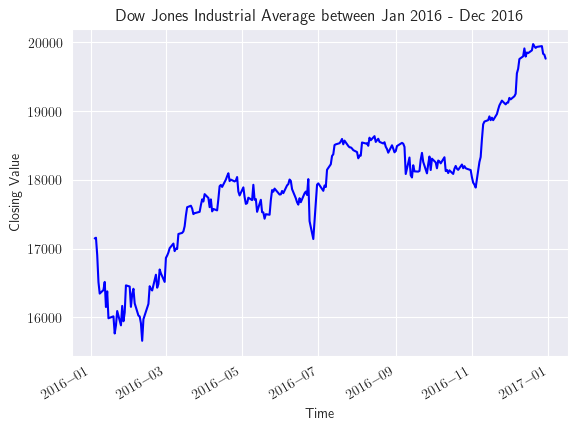

In [7]:
plt.figure()
djia_ts.plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value');

In [8]:
def firstsmooth(y, lambda_, start=None):
    ytilde = y.copy()
    if start is None:
        start = y[0]
    ytilde[0] = lambda_ * y[0] + (1 - lambda_) * start
    for i in range(1, len(y)):
        ytilde[i] = lambda_ * y[i] + (1 - lambda_) * ytilde[i - 1]
    return ytilde

In [9]:
dji_smooth1 = firstsmooth(y=djia_ts, lambda_=0.4)

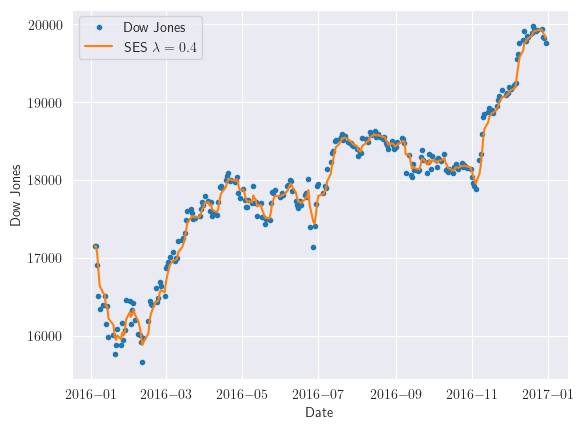

In [10]:
plt.plot(djia_ts, marker='o', linestyle='', markersize=3, label='Dow Jones')
plt.plot(dji_smooth1, label='SES $\lambda=0.4$')
plt.xlabel('Date')
plt.ylabel('Dow Jones')
plt.legend()
plt.show()

In [11]:
def measacc_fs(y, lambda_):
    out = firstsmooth(y, lambda_)
    T = len(y)
    yh = y.copy().values
    out = pd.concat([pd.Series([y[0]]), out.iloc[:-1]], ignore_index=True).values
    prederr = yh - out
    SSE = sum(prederr**2)
    MAPE = 100 * sum(abs(prederr / yh)) / T
    MAD = sum(abs(prederr)) / T
    MSD = sum(prederr**2) / T
    ret1 = pd.DataFrame({
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD]
    })
    ret1.reset_index(drop=True, inplace=True)
    return ret1

In [12]:
measacc_fs(djia_ts, 0.4)

,SSE,MAPE,MAD,MSD
0,6.844383e+06,0.689939,121.602389,27160.251204


In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
def measacc_hw(y, lambda_):
    model = ExponentialSmoothing(y.values)
    fit = model.fit(smoothing_level=lambda_)
    T = len(y)
    yh = y.copy().values
    y_pred = pd.Series(data=fit.fittedvalues, index=y.index)
    out = pd.concat([pd.Series([y[0]]), y_pred[:-1]], ignore_index=True).values
    prederr = yh - out
    SSE = sum(prederr**2)
    MAPE = 100 * sum(abs(prederr / yh)) / T
    MAD = sum(abs(prederr)) / T
    MSD = sum(prederr**2) / T
    ret1 = pd.DataFrame({
        "SSE": [SSE],
        "MAPE": [MAPE],
        "MAD": [MAD],
        "MSD": [MSD]
    })
    ret1.reset_index(drop=True, inplace=True)
    return ret1

In [15]:
measacc_hw(djia_ts, 0.4)

,SSE,MAPE,MAD,MSD
0,1.084431e+07,0.876061,154.763888,43032.984921


- En este caso, se obtuvo un MAPE del 0.87% lo cual significa que, ***en promedio, las predicciones tienen un error del 0.87% en relación con los valores reales***, el cual es más alto que el implementado en la función `firstsmooth`.

## Modelado de datos de series temporales

````{prf:theorem}

- Considere un ***proceso constante***, esto es, un proceso donde los datos de series de tiempo se espera que varíen en torno a un nivel constante, con fluctuaciones aleatorias, las cuales son caracterizadas usualmente por ***errores no correlacionados con media 0 y varianza constante***. 

- La clase general de modelos puede expresarse como

    $$
    y_{t}=f(t, \boldsymbol{\beta})+\varepsilon_{t},
    $$

    donde $\boldsymbol{\beta}$ es un vector de parámetros desconocidos y $\varepsilon_{t}$ representa errores no correlacionados. 

- El ***proceso constante*** es miembro de esta clase general:

    $$
    y_{t}=\beta_{0}+\varepsilon_{t},
    $$

    donde $\beta_{0}$ es igual a $\mu$.

- Entonces, la ***estimación de mínimos cuadrados ponderada*** de $\beta_{0}$ en el proceso constante, con ***pesos exponencialmente decrecientes en el tiempo*** es

$$
\hat{\beta}_{0}=(1-\theta)\sum_{t=0}^{T-1}\theta^{t}y_{T-t}.
$$
````

**`Demostración`**

- Consideremos la ***suma de errores cuadráticos*** para el proceso constante, dada por

$$
SS_{E}=\sum_{t=1}^{T}(y_{t}-\mu)^{2}
$$

- Si afirmamos que no todas las observaciones deberían tener igual influencia sobre la suma, introducimos una cadena de ***pesos geométricamente decrecientes en tiempo***

$$
SS_{E}^{\star}=\sum_{t=0}^{T-1}\theta^{t}(y_{T-t}-\beta_{0})^{2},~\text{donde}~|\theta|<1.
$$(error_sq_sum1)

- Derivando la Ecuación {eq}`error_sq_sum1` con respecto a $\beta_{0}$ e igualando a cero obtenemos el ***estimador por mínimos cuadrados*** para $\beta_{0}$

$$
\begin{align*}
\frac{\partial SS_{E}^{\star}}{\partial\beta_{0}} &= \frac{\partial}{\partial\beta_{0}}\left(\sum_{t=0}^{T-1}\theta^{t}(y_{T-t}-\hat{\beta}_{0})^{2}\right)=-2\sum_{t=0}^{T-1}\theta^{t}(y_{T-t}-\hat{\beta}_{0})=0
\end{align*}
$$

- Dado que $\sum_{t=0}^{T-1}\theta^{t}=(1-\theta^{T})/(1-\theta)$, entonces

$$
\hat{\beta}_{0}=\frac{1-\theta}{1-\theta^{T}}\sum_{t=0}^{T-1}\theta^{t}y_{T-t}\rightarrow(1-\theta)\sum_{t=0}^{T-1}\theta^{t}y_{T-t},\quad\text{para valores grandes de}~T.
$$

- Nótese que $\hat{\beta}_{0}=\tilde{y}_{T}$. Esto es, el proceso de suavización exponencial simple en efecto provee una ***estimación de mínimos cuadrados ponderada*** de $\beta_{0}$, para el proceso constante con pesos que son exponencialmente decrecientes en el tiempo.

``````{admonition} Observación
- Retomando con nuestra clase de modelo general $y_{t}=f(t; \boldsymbol{\beta})+\varepsilon_{t},~f(t, \boldsymbol{\beta})$ puede ser cualquier función de $t$.
- Por ejemplo, para ***series de tiempo no estacionarias***, es mas conveniente considerar una ***familia polinómica***, donde el proceso constante es el modelos mas simple que podemos considerar.
``````

## Suavización exponencial de segundo orden

``````{prf:theorem}
- Un modelo apropiado en tiempo para ***tendencias lineales*** está dado por:

    $$
    y_{t}=\beta_{0}+\beta_{1}t+\varepsilon_{t},
    $$

    donde $\varepsilon_{t}$ es no correlacionado con media 0 y varianza constante $\sigma_{\varepsilon}^{2}$.

- Demuestre que el suavizador exponencial simple es un estimador sesgado para el ***modelo de tendencia lineal*** y la cantidad de sesgo es: $-(1-\lambda)\beta_{1}/\lambda$, donde

$$
\text{E}(\tilde{y}_{T})=\beta_{0}+\beta_{1}T-\frac{1-\lambda}{\lambda}\beta_{1}=\text{E}(y_{T})-\frac{1-\lambda}{\lambda}\beta_{1}.
$$

- Dada la ***suavización exponencial de segundo orden*** definida por:

    $$
    \tilde{y}_{T}^{(2)}=\lambda\tilde{y}_{T}^{(1)}+(1-\lambda)\tilde{y}_{T-1}^{(2)},
    $$

    donde $\tilde{y}_{T}^{(1)}, \tilde{y}_{T}^{(2)}$ denotan las suavizaciones exponenciales de primer y segundo orden respectivamente, demuestre que el predictor de $\tilde{y}_{T}$ está dado por

    $$
    \tilde{y}_{T}=2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}.
    $$ 

- Puede demostrarse  además que $\tilde{y}_{T}$ es insesgado.
``````

**`Demostración`**

- Bajo el supuesto de independencia sobre $(y_{t})_{t=1}^{\infty}$, calculamos suavización exponencial para datos de series de tiempo que exhiben tendencia lineal

$$
\text{E}(\tilde{y}_{T})=\text{E}\left(\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}y_{T-t}\right)=\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}\text{E}(y_{T-t}).
$$

- Dado que para la tendencia lineal: $\text{E}(y_{t})=\text{E}(\beta_{0}+\beta_{1}t+\varepsilon_{t})=\beta_{0}+\beta_{1}t$, entonces

$$
\begin{align*}
\text{E}(\tilde{y}_{T}) &= \lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}(\beta_{0}+\beta_{1}(T-t))\\
&= \lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}(\beta_{0}+\beta_{1}T)-\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}(\beta_{1}t)\\
&= (\beta_{0}+\beta_{1}T)\lambda\sum_{t=0}^{T-1}(1-\lambda)^{t}-\lambda\beta_{1}\sum_{t=0}^{T-1}(1-\lambda)^{t}t.
\end{align*}
$$

- Dado que $|1-\lambda|<1$ se tiene que $\sum_{t=0}^{T-1}(1-\lambda)^{t}=1/(1-(1-\lambda))=1/\lambda$. Nótese además que

$$
\begin{align*}
\sum_{t=0}^{\infty}(1-\lambda)^{t}t&=(1-\lambda)\sum_{t=0}^{\infty}t(1-\lambda)^{t-1}\\
&= -(1-\lambda)\sum_{t=0}^{\infty}\frac{\partial}{\partial\lambda}(1-\lambda)^{t}\\
&= -(1-\lambda)\frac{\partial}{\partial\lambda}\left(\sum_{t=0}^{\infty}(1-\lambda)^{t}\right)\\
&= -(1-\lambda)\frac{\partial}{\partial\lambda}\left(\frac{1}{1-(1-\lambda)}\right)\\
&= -(1-\lambda)\frac{\partial}{\partial\lambda}\left(\frac{1}{\lambda}\right)=-(1-\lambda)\left(-\frac{1}{\lambda^{2}}\right)=\frac{1-\lambda}{\lambda^{2}}.
\end{align*}
$$

- Entonces 

$$
\text{E}(\tilde{y}_{T})=(\beta_{0}+\beta_{1}T)\lambda\left(\frac{1}{\lambda}\right)-\lambda\beta_{1}\left(\frac{1-\lambda}{\lambda^{2}}\right)=(\beta_{0}+\beta_{1}T)-\frac{1-\lambda}{\lambda}\beta_{1}=\text{E}(y_{T})-\frac{1-\lambda}{\lambda}\beta_{1}.
$$

- Esto es, la suavización exponencial simple es ***sesgada como estimador*** y la cantidad de sesgo está dada por $-(1-\lambda)\beta_{1}/\lambda$, la cual puede generar ***errores de subestimación***. 
- Una solución puede ser usar $\lambda$ grande, ya que $(1-\lambda)/\lambda\rightarrow0$ cuando $\lambda\rightarrow1$. Técnicas autoadaptativas para $\lambda$ pueden ser estudiadas, las cuales sigan los cambios en el proceso.

- Dado que la suavización de segundo orden está dada por

    $$
    \tilde{y}_{T}^{(2)}=\lambda\tilde{y}_{T}^{(1)}+(1-\lambda)y_{T-1}^{(2)},
    $$

    esto es, $\tilde{y}_{T}^{(2)}$ es obtenida aplicando suavización exponencial simple a $\tilde{y}_{T}$.

- Por ***motivos de derivación de la expresión, consideramos el mismo*** $\lambda$ para $\tilde{y}_{T}^{(1)}$ y $\tilde{y}_{t}^{(2)}$. Dado que la suavización exponencial de primer orden es sesgada, su suavización (***suavización de segundo orden***) también es sesgada. Entonces

$$
\text{E}(\tilde{y}_{T}^{(2)})=\text{E}(\tilde{y}_{T}^{(1)})-\frac{1-\lambda}{\lambda}\beta_{1}. 
$$

- Además

$$
\frac{1-\lambda}{\lambda}\beta_{1}=\text{E}(\tilde{y}_{T}^{(1)})-E(\tilde{y}_{T}^{(2)})\Rightarrow\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}=\frac{1-\lambda}{\lambda}\beta_{1},~\text{entonces}
$$

$$
\textcolor{red}{\hat{\beta}_{1, T}=\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})}.
$$(beta1_estimation_eq)

- Usando la Ecuación {eq}`beta1_estimation_eq` tenemos que: $\text{E}(\tilde{y}_{T}^{(1)})=(\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T)-(1-\lambda)\hat{\beta}_{1, T}/\lambda$, entonces, análogamente

$$
\textcolor{red}{\hat{\beta}_{0, T}=\tilde{y}_{T}^{(1)}-T\hat{\beta}_{1, T}+\displaystyle{\frac{1-\lambda}{\lambda}}\hat{\beta}_{1, T}.}
$$(beta0_estimation_eq)

- Reescribiendo $\hat{\beta}_{0, T}$ en términos de $\tilde{y}_{T}^{(1)}$ y $\tilde{y}_{T}^{(2)}$ obtenemos

$$
\begin{align*}
\hat{\beta}_{0, T} &= \tilde{y}_{T}^{(1)}-T\left(\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\right)+\frac{1-\lambda}{\lambda}\left(\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\right)\\
&= \tilde{y}_{T}^{(1)}-T\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})+(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\\
&= \left(2-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}\right)y_{T}^{(2)},
\end{align*}
$$

- Entonces

$$
\textcolor{red}{\hat{\beta}_{0, T} = \left(2-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}\right)y_{T}^{(2)}},
$$(beta0_estimation_eq_yhat)

- Combinando las Ecuaciones {eq}`beta1_estimation_eq`-{eq}`beta0_estimation_eq_yhat` tenemos que

$$
\begin{align*}
\tilde{y}_{T} &= \hat{\beta}_{0, T}+\hat{\beta}_{1, T}T=\left(2-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(2)}+\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})T\\
&= \left(2-T\frac{\lambda}{1-\lambda}+T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(1)}-\left(1-T\frac{\lambda}{1-\lambda}+T\frac{\lambda}{1-\lambda}\right)\tilde{y}_{T}^{(2)}\\[2mm]
&=2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}.
\end{align*}
$$

- Entonces

$$
\textcolor{red}{\tilde{y}_{T}=2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)}}
$$(first_exp_smooth)

- Nótese que como

$$
\text{E}(\tilde{y}_{T}^{(1)}) = (\beta_{0}+\beta_{1}T)-\frac{1-\lambda}{\lambda}\beta_{1}\Rightarrow\tilde{y}_{T}^{(1)}=(\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T)-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}
$$

- Además

$$
\begin{align*}
\text{E}(\tilde{y}_{T}^{(2)}) &= \text{E}(\tilde{y}_{T}^{(1)})-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}=\text{E}\left((\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T)-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}\right)-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}\\
&= (\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}=(\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-2\left(\frac{1-\lambda}{\lambda}\right)\hat{\beta}_{1, T}
\end{align*}
$$

- Entonces

$$
\textcolor{red}{
\begin{align*}
\tilde{y}_{T}^{(1)} &= (\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, T}\\
\tilde{y}_{T}^{(2)} &= (\hat{\beta}_{0, T}+\hat{\beta}_{1, T})-2\left(\frac{1-\lambda}{\lambda}\right)\hat{\beta}_{1, T}
\end{align*}
}
$$

- Con los respectivos valores iniciales

$$
\begin{align*}
\tilde{y}_{0}^{(1)} &= \hat{\beta}_{0, 0}-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, 0}\\
\tilde{y}_{0}^{(2)} &= \hat{\beta}_{0, 0}-2\left(\frac{1-\lambda}{\lambda}\right)\hat{\beta}_{1, 0}
\end{align*}
$$

- La ***estimación de los parámetros iniciales*** es obtenida usualmente por medio del ***método de mínimos cuadrado***. Por ejemplo, los parámetros $\hat{\beta}_{0, 0}, \hat{\beta}_{1, 0}$ asociados al ***US Consumer Prices Index (CPI)*** de Enero 1995 a Diciembre 2004, obtenidos por mínimos cuadrados están dados por $\hat{\beta}_{0, 0}=149.89$ y $\hat{\beta}_{1, 0}=0.3$. Usando $\lambda=0.3$ se tiene que

$$
\begin{align}
\hat{y}_{0}^{(1)} &= \hat{\beta}_{0, 0}-\frac{1-\lambda}{\lambda}\hat{\beta}_{1, 0}=149.89-\frac{1-0.3}{0.3}0.3=146.22\\
\hat{y}_{0}^{(2)} &= \hat{\beta}_{0, 0}-2\frac{1-\lambda}{\lambda}\hat{\beta}_{1, 0}=149.89-2\frac{1-0.3}{0.3}0.3=142.56\\
\end{align}
$$

## Implementación $DES$

In [16]:
import matplotlib.pyplot as plt

In [17]:
cpi_smooth1 = firstsmooth(y=djia_ts, lambda_=0.3)
cpi_smooth2 = firstsmooth(y=cpi_smooth1, lambda_=0.3)

In [18]:
cpi_hat = 2 * cpi_smooth1 - cpi_smooth2

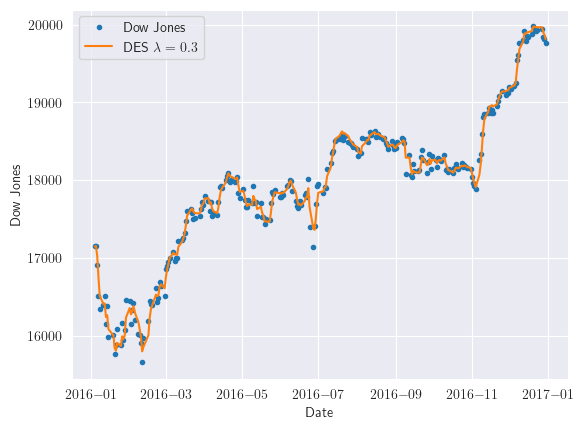

In [19]:
plt.plot(djia_ts, marker='o', linestyle='', markersize=3, label='Dow Jones')
plt.plot(cpi_hat, label='DES $\lambda=0.3$')
plt.xlabel('Date')
plt.ylabel('Dow Jones')
plt.legend()
plt.show()

## Suavización exponencial de alto orden

- Hasta ahora hemos discutido el uso de suavizadores exponenciales al estimar los ***modelos de tendencia constante y lineal***. Para el primero empleamos el suavizador exponencial simple o de primer orden y para el segundo el suavizador exponencial de segundo orden. Además, se puede demostrar que para el ***modelo polinómico general de*** $n\text{th}$-ésimo grado de la forma

    $$
    y_{t}=\beta_{0}+\beta_{1}t+\frac{\beta_{2}}{2!}t^{2}+\cdots+\frac{\beta_{n}}{n!}t^{n}+\varepsilon_{t},
    $$(highorder_exponential_smoothing)

    donde $\varepsilon_{t}$ se supone independiente con media 0 y varianza constante $\sigma_{\varepsilon}^{2}$, empleamos suavizadores exponenciales de orden $n-1$

    $$
    \begin{align*}
    \tilde{y}_{T}^{(1)} &= \lambda y_{T}+(1-\lambda)\tilde{y}_{T-1}^{(1)}\\
    \tilde{y}_{T}^{(2)} &= \lambda \tilde{y}_{T}^{(1)}+(1-\lambda)\tilde{y}_{T-1}^{(2)}\\
    &\vdots\\
    \tilde{y}_{T}^{(n)} &= \lambda \tilde{y}_{T}^{(n-1)}+(1-\lambda)\tilde{y}_{T-1}^{(n)},
    \end{align*}
    $$
    
    para estimar los parámetros del modelo.

````{admonition} Observación
:class: tip

- Incluso para el modelo cuadrático, los cálculos se vuelven bastante complicados. Consulte {cite}`montgomery1990forecasting`, {cite}`brown2004smoothing` y {cite}`abraham2009statistical` para las ***soluciones a problemas de suavizamiento exponencial de orden superior*** (***`bonus`***).

- Si un polinomio de alto orden parece ser necesario para la serie de tiempo, los ***modelos autorregresivos de media móvil integrada (ARIMA) pueden considerarse en cambio***.
````

## Forecasting

``````{admonition} Forecasting
- En el tiempo $T$, deseamos ***predecir la observación en la unidad de tiempo siguiente***, $T+1$, u otro valor en el futuro. Denotaremos el pronóstico $\tau$ pasos hacia adelante (*horizonte* $\tau$) realizado en el tiempo $T$ como $\hat{y}_{T+\tau}(T)$.
``````

### Proceso constante

- La ***suavización exponencial de primer orden*** para el proceso constante está dada por 

$$
\tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1}
$$

- Se demostró también que $f(t, \boldsymbol{\beta})=\beta_{0}$ puede ser estimado con $\tilde{y}_{T}$. Dado que ***hasta el momento, el error aleatorio no puede ser predicho***

$$
\hat{y}_{T+\tau}(T)=\tilde{y}_{T}=\hat{\beta}_{0}.
$$

- Dado que ***pronósticos constantes pueden no ser correctos*** a medida que vamos acumulando observaciones, ***actualizamos nuestra predicción por medio de técnicas como `rolling`***.

- Por ejemplo, si la observación en el tiempo $T+1$ está disponible, nuestro pronóstico para futuras observaciones sería

$$
\begin{align*}
\tilde{y}_{T+1} &= \lambda y_{T+1}+(1-\lambda)\tilde{y}_{T},\quad\text{o bien}\\
\tilde{y}_{T+1+\tau}(T+1) &= \lambda y_{T+1}+(1-\lambda)\tilde{y}_{T+\tau}(T)\\[4mm]
\end{align*}
$$(fc_in_tplustau_eq)

``````{figure} ./figures/forecasttau_timeseries.png
:align: center
:name: forecasttau_timeseries_fig
:scale: 18
``````

- Para $\tau=1$ la Ecuación {eq}`fc_in_tplustau_eq` puede reescribirse como

    $$
    \begin{align*}
    \tilde{y}_{T+2}(T+1) &= \lambda y_{T+1}+(1-\lambda)\tilde{y}_{T+1}(T)\\
    &= \tilde{y}_{T+1}(T)+\lambda(y_{T+1}-\tilde{y}_{T+1}(T))\\
    &= \tilde{y}_{T+1}(T)+\lambda e_{T+1}(1),
    \end{align*}
    $$

    donde $e_{T+1}(1):=y_{T+1}-\tilde{y}_{T+1}(T)$ es llamado, predicción de un paso hacia adelante (***one-step-ahead***) o error de predicción.

``````{admonition} Observación
- Pronostico para la observación siguiente es simplemente, el ***pronostico actual mas una fracción del error cometido en el pronostico de la observación actual***
- Nótese que la velocidad de reacción del pronostico al error de predicción depende del factor de descuento $\lambda$ 
``````

## Selección de $\lambda$

- Definimos la ***suma de cuadrado para los errores de predicción de horizonte 1*** como

$$
SS_{E}(\lambda)=\sum_{t=1}^{T}e_{t}^{2}(1).
$$

``````{admonition} Observación
:class: tip
- Para un conjunto histórico de datos, podemos en general calcular $SS_{E}(\lambda)$ para varios valores de $\lambda$ y ***seleccionar aquel con la menor suma de errores de predicción al cuadrado***.
``````

- Por ejemplo, supongamos que interesados en la ***velocidad promedio en un tramo específico de una autopista durante las horas no pico***. Durante el último año y medio (78 semanas), tenemos disponibles ***promedios semanales de la velocidad promedio en millas por hora entre las 10 a. m. y las 3 p. m***. Los datos se presentan en la siguiente tabla

In [20]:
import pandas as pd

In [21]:
speed_df = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/main/weekly_average_speed.csv")
speed_df.head()

,week,speed
0,1,47.12
1,2,45.01
2,3,44.69
3,4,45.41
4,5,45.45


In [22]:
speed_ts = pd.Series(data=speed_df['speed'].values, index=speed_df.index)

In [23]:
speed_ts.head()

0    47.12
1    45.01
2    44.69
3    45.41
4    45.45
dtype: float64

- La siguiente figura muestra que los ***datos de la serie temporal siguen un proceso constante***. Sin embargo, para ***suavizar la variación excesiva, podemos usar el suavizado exponencial de primer orden***. La "mejor" constante de suavizado se puede determinar encontrando el valor de la constante de suavizado que minimiza la suma de los errores de predicción de un paso adelante al cuadrado.

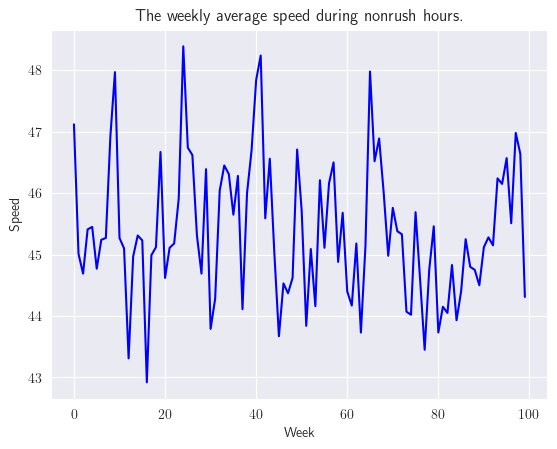

In [24]:
plt.figure()
speed_ts.plot(color='b')
plt.title('The weekly average speed during nonrush hours.')
plt.xlabel('Week')
plt.ylabel('Speed');

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
lambda_vec = np.arange(0.1, 1.0, 0.1)

In [27]:
def sse_speed(sc):
    return measacc_fs(speed_ts, sc)['SSE'].values[0]

In [28]:
sse_vec = pd.Series()
for lambda_ in lambda_vec:
    sse_vec.loc[len(sse_vec)] = sse_speed(lambda_)

In [29]:
opt_lambda = sse_vec.min()

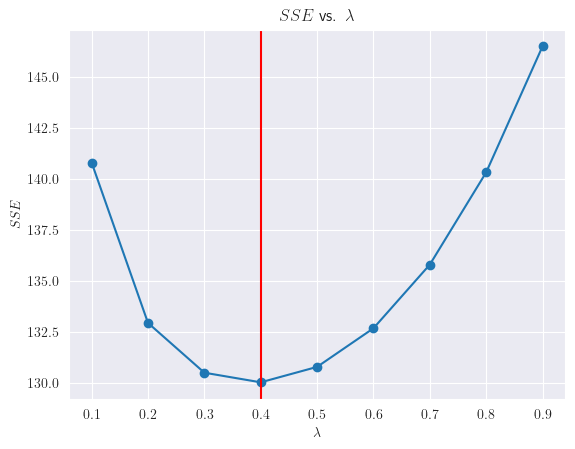

In [30]:
plt.plot(lambda_vec, sse_vec, marker='o', linestyle='-')
plt.title("$SSE$ vs. $\lambda$")
plt.xlabel('$\lambda$')
plt.ylabel('$SSE$')
plt.axvline(x=lambda_vec[sse_vec.idxmin()], color='red')
plt.show()

## Intervalo de predicción

- El cálculo de intervalos de predicción requiere de la ***estimación de la varianza del error de predicción***. Este tipo de técnicas serán estudiadas mas adelante en la presente sección

``````{admonition} Proceso contante
- Para un ***proceso constante, el intervalo de predicción*** $100(1-\alpha/2)$ para cualquier horizonte $\tau$ está dado por

    $$
    \tilde{y}\pm Z_{\alpha/2}\hat{\sigma}_{e},
    $$

    donde $\tilde{y}_{T}$ es la ***suavización exponencial de primer orden***, $Z_{\alpha/2}$ es el $100(1-\alpha/2)$ percentíl de la distribución normal estándar, y $\hat{\sigma}_{e}$ es la estimación de la desviación estándar de los errores predichos.
``````

- Encontraremos solución a problemas de intervalo constante para todos los horizontes de predicción.

``````{admonition} Proceso de tendencia lineal
:class: tip

- El pronóstico de horizonte $\tau$ para el ***modelo de tendencia lineal*** está dado por

$$
\hat{y}_{T+\tau}=\hat{\beta}_{0, T}+\hat{\beta}_{1, T}(T+\tau)=\hat{\beta}_{0, T}+\hat{\beta}_{1, T}T+\hat{\beta}_{1, T}\tau=\hat{y}_{T}+\hat{\beta}_{1, T}\tau.
$$

- En términos de suavizadores exponenciales

$$
\begin{align*}
\hat{y}_{T+\tau}(T) &= (2\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})+\tau\frac{\lambda}{1-\lambda}(\tilde{y}_{T}^{(1)}-\tilde{y}_{T}^{(2)})\\
&= \left(2+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(1)}-\left(1+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(2)}.
\end{align*}
$$
``````

- Nótese que ***las predicciones dependerán ahora del horizonte de predicción*** $\tau$. En este caso, el $100(1-\alpha/2)$ intervalo de predicción para cualquier horizonte de tiempo $\tau$ está dado por (***`bonus`***)

  $$
  \left(2+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(1)}-\left(1+\frac{\lambda}{1-\lambda}\tau\right)\tilde{y}_{T}^{(2)}\pm Z_{\alpha/2}\frac{c_{\tau}}{c_{1}}\hat{\sigma}_{e}.
  $$

  donde

  $$
  c_{i}^{2}=1+\frac{\lambda}{(2-\lambda)^{3}}[(10-14\lambda+5\lambda^{2})+2i\lambda(4-3\lambda)+2i^{2}\lambda^{2}].
  $$

- A manera de ejemplo, consideremos los datos asociados al ***US Consumer Price Index (CPI)***. Como primera opción, realizaremos ***pronósticos para todo el año 2004*** (*pronósticos de 1 a 12 pasos por delante*)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
cpi_data = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/main/CPI.csv", skiprows=1, skipfooter=1, engine='python')

In [33]:
cpi_data.head()

,Year,Period,Consumer Price Index,Over-the-Year Percent Change,Over-the-Month Percent Change
0,2024,March,312.3,3.5%,0.6%
1,2024,February,310.3,3.2%,0.6%
2,2024,January,308.4,3.1%,0.5%
3,2023,December,306.7,3.4%,-0.1%
4,2023,November,307.1,3.1%,-0.2%


In [34]:
cpi_data['Date'] = cpi_data['Period'].astype(str) + '-' + cpi_data['Year'].astype(str)

In [35]:
cpi_data.index = cpi_data['Date']
cpi_data.drop('Date', axis=1, inplace=True)
cpi_data.head()

,Year,Period,Consumer Price Index,Over-the-Year Percent Change,Over-the-Month Percent Change
Date,,,,,
March-2024,2024,March,312.3,3.5%,0.6%
February-2024,2024,February,310.3,3.2%,0.6%
January-2024,2024,January,308.4,3.1%,0.5%
December-2023,2023,December,306.7,3.4%,-0.1%
November-2023,2023,November,307.1,3.1%,-0.2%


In [36]:
cpi_ts = pd.Series(data=cpi_data['Consumer Price Index'].values, index=cpi_data.index)[::-1]

In [37]:
cpi_ts

Date
January-1913       9.8
February-1913      9.8
March-1913         9.8
April-1913         9.8
May-1913           9.7
                 ...  
November-2023    307.1
December-2023    306.7
January-2024     308.4
February-2024    310.3
March-2024       312.3
Length: 1335, dtype: float64

- Consideremos el ***US Consumer Price Index (CPI)*** de Estados Unidos ***desde enero de 1995 hasta diciembre de 2004***. La siguiente figura muestra claramente que los datos exhiben una tendencia lineal.

In [38]:
cpi_dates = cpi_ts[cpi_ts.index.get_loc('January-1995'):cpi_ts.index.get_loc('December-2004')+1]

In [39]:
cpi_dates

Date
January-1995      150.3
February-1995     150.9
March-1995        151.4
April-1995        151.9
May-1995          152.2
                  ...  
August-2004       189.5
September-2004    189.9
October-2004      190.9
November-2004     191.0
December-2004     190.3
Length: 120, dtype: float64

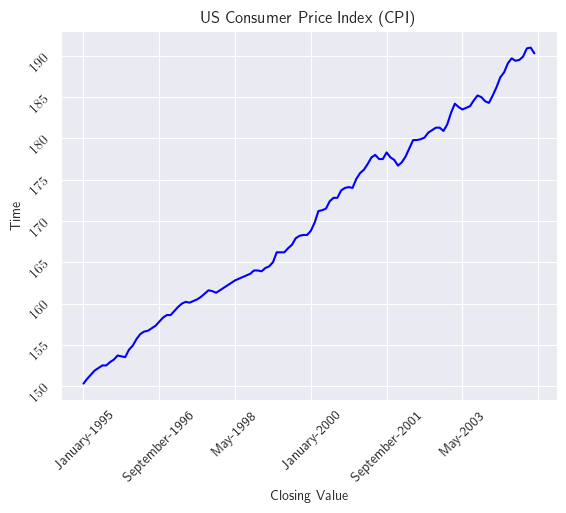

In [40]:
fig, ax = plt.subplots()

cpi_dates.plot(ax=ax, color='b')
ax.set_title('US Consumer Price Index (CPI)')
ax.set_xlabel('Closing Value')
ax.set_ylabel('Time')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)

plt.show()

- En ***diciembre de 2003***, realiza las ***previsiones para todo el año 2004*** (*previsiones de 1 a 12 pasos adelante*)

In [41]:
lambda_ = 0.3
tau_length = 12

In [42]:
cpi_smooth1 = firstsmooth(cpi_dates.iloc[:-tau_length], lambda_)
cpi_smooth2 = firstsmooth(cpi_smooth1, lambda_)

In [43]:
cpi_hat = 2 * cpi_smooth1 - cpi_smooth2

In [44]:
tau = np.arange(1, tau_length+1)

In [45]:
T = len(cpi_smooth1)

In [46]:
cpi_forecast = (2 + tau * (lambda_ / (1 - lambda_))) * cpi_smooth1[T-1] - (1 + tau * (lambda_ / (1 - lambda_))) * cpi_smooth2[T-1]

In [47]:
ctau = np.sqrt(1 + (lambda_ / ((2 - lambda_)**3)) * (10 - 14 * lambda_ + 5 * (lambda_**2) + 2 * tau * lambda_ * (4 - 3 * lambda_) + 2 * (tau**2) * (lambda_**2)))

In [48]:
alpha_lev = 0.05

In [49]:
sig_est = np.sqrt(np.var(cpi_dates.iloc[1:] - cpi_hat[:-1]))

In [50]:
cl = np.quantile(ctau / ctau[0] * sig_est, 1 - alpha_lev / 2)

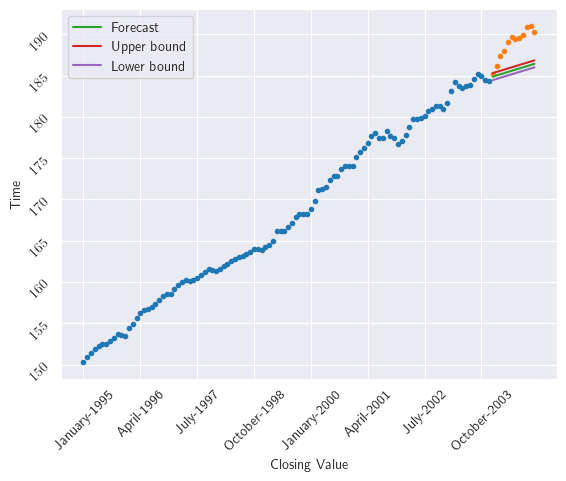

In [51]:
fig, ax = plt.subplots()
ax.plot(cpi_dates.index[:-tau_length], cpi_dates.iloc[:-tau_length].values, marker='o', linestyle='', markersize=3)
ax.plot(cpi_dates.index[-tau_length:], cpi_dates.iloc[-tau_length:].values, marker='o', linestyle='', markersize=3)
ax.plot(cpi_dates.index[-tau_length:], cpi_forecast, label='Forecast')
ax.plot(cpi_dates.index[-tau_length:], cpi_forecast + cl, label='Upper bound')
ax.plot(cpi_dates.index[-tau_length:], cpi_forecast - cl, label='Lower bound')
n = 15
plt.xticks(range(0, len(cpi_dates.index), n), rotation=45)
ax.set_xlabel('Closing Value')
ax.set_ylabel('Time')
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)
plt.legend()
plt.show()

- Como segunda opción. ***En diciembre de 2003, hacer el pronóstico para enero de 2004***. Luego, ***cuando los datos de enero de 2004 estén disponibles, hacer el pronóstico para febrero de 2004*** (*solo pronósticos de un paso por delante*)"

In [52]:
import numpy as np
from scipy.stats import norm

In [53]:
lambda_ = 0.3
T = 108
tau = 12
alpha_lev = 0.05
cpi_forecast = np.zeros(tau)
cl = np.zeros(tau)
cpi_smooth1 = np.zeros(T + tau)
cpi_smooth2 = np.zeros(T + tau)

In [54]:
for i in range(1, tau + 1):
    cpi_smooth1[:T + i - 1] = firstsmooth(y=cpi_dates.iloc[:T + i - 1], lambda_=lambda_)
    cpi_smooth2[:T + i - 1] = firstsmooth(y=cpi_smooth1[:T + i - 1], lambda_=lambda_)
    cpi_forecast[i - 1] = (2 + (lambda_ / (1 - lambda_))) * cpi_smooth1[T + i - 2] - \
                          (1 + (lambda_ / (1 - lambda_))) * cpi_smooth2[T + i - 2] # horizon one each time
    cpi_hat = 2 * cpi_smooth1[:T + i - 1] - cpi_smooth2[:T + i - 1]
    sig_est = np.sqrt(np.var(cpi_dates.iloc[1:T + i - 1] - cpi_hat[:-1]))
    cl[i - 1] = norm.ppf(1 - alpha_lev / 2) * sig_est

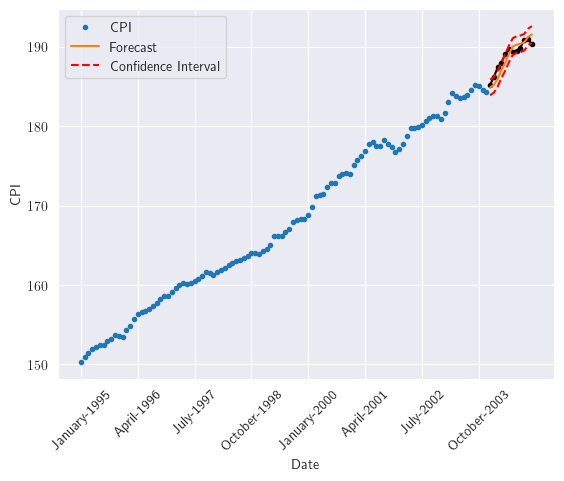

In [55]:
plt.figure()
plt.plot(cpi_dates.index[:-tau], cpi_dates.iloc[:-tau].values, marker='o', linestyle='', markersize=3, label='CPI')
plt.plot(cpi_dates.index[-tau:], cpi_dates.iloc[-tau:].values, marker='o', markersize=3, color='black')
plt.plot(cpi_dates.index[-tau:], cpi_forecast, label='Forecast')
plt.plot(cpi_dates.index[-tau:], cpi_forecast + cl, linestyle='--', color='red', label='Confidence Interval')
plt.plot(cpi_dates.index[-tau:], cpi_forecast - cl, linestyle='--', color='red')
plt.legend()
n = 15
plt.xticks(range(0, len(cpi_dates.index), n), rotation=45)
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

## Estimación de $\sigma_{e}^{2}$

- En el proceso de ***estimar la varianza de los errores de pronóstico***, representada como $\sigma_{e}^{2}$, frecuentemente se postula que ***el modelo subyacente*** (por ejemplo, *constante, tendencia lineal*) es ***correcto e invariante en el tiempo*** (*predicciones precisas y estables a medida que se avanza en el tiempo*). Bajo estas condiciones, dos metodologías distintas están disponibles para estimar $\sigma_{e}^{2}$

```{admonition} Bonus
:class: tip

- Encuentre la ***estimación de la varianza de los errores de pronóstico*** $\sigma_{e}^{2}$ para el modelo de suavización exponencial. Utilice los siguientes documentos como guía [Peter Wanke et. al](https://www.pomsmeetings.org/confproceedings/015/fullpapers/015-0271.pdf) y [Kuliah Genap](http://adjifern.lecture.ub.ac.id/files/2016/03/bahan-ADE-minggu-11b.pdf), así como aquellos que encuentre en su revisión.
```

1. Dado el pronóstico `one-step-ahead` definido como $e_{T}(1)=y_{T}-\hat{y}_{T}(T-1)$. El objetivo es aplicar el modelo a los datos históricos y obtener la ***varianza del error de pronóstico*** a calcular 

$$
\sigma_{e}^{2}=\frac{1}{T}\sum_{t=1}^{T}e_{t}^{2}(1)=\frac{1}{T}\sum_{t=1}^{T}(y_{t}-\hat{y}_{t}(t-1))^{2}.
$$

- Nótese que en el cálculo de la varianza, la media del ajuste no fue necesaria, ya que para el modelo correcto los pronósticos son insesgados; esto es, ***el valor esperado de los errores de pronóstico es 0***. 

- A medida que se recopilan más datos, la varianza de los errores de pronóstico puede ser actualizada

$$
\hat{\sigma}_{eT+1}=\frac{1}{T+1}\left(T\hat{\sigma}_{e, T}^{2}+e_{T+1}^{2}(1)\right).
$$

- Puede resultar contraintuitivo tener una varianza constante de errores de pronóstico para todos los horizontes de predicción. En su lugar, podemos definir $\sigma_{e}^{2}(\tau)$ como la ***varianza del error de pronóstico a*** $\tau$ ***pasos hacia adelante*** y estimarla mediante

$$
\hat{\sigma}_{e}^{2}(\tau)=\frac{1}{T-\tau+1}\sum_{t=\tau}^{T}e_{1}^{2}(\tau).
$$(error_variance_estimation_tau)

- Por lo tanto, la estimación en la Ecuación {eq}`error_variance_estimation_tau` puede ser utilizada en los cálculos del ***intervalo de predicción para el pronóstico a*** $\tau$ ***pasos hacia adelante***.

2. Para el segundo método de estimación de $\sigma_{e}^{2}$, primero definiremos la ***desviación media absoluta*** $\Delta$ como

    $$
    \Delta = \text{E}(|e-\text{E}(e)|)
    $$
    
    y, asumiendo que el modelo es correcto, calcular su estimación mediante

    $$
    \hat{\Delta}_{T}=\delta|e_{T}(1)|+(1-\delta)\hat{\Delta}_{T-1}.
    $$(mean_absolute_deviationT)

    Entonces, el estimador de $\sigma_{e}^{2}$ está dado por {cite}`montgomery1990forecasting` (***`bonus`***)

    $$
    \hat{\sigma}_{e, T}=1.25\hat{\Delta}_{T}.
    $$

## Adaptación actualizada del factor de descuento

- Cambios en el modelo subyacente de series temporales dificultarán que el suavizador exponencial con factor de descuento fijo siga estos cambios. Por lo tanto, surge la necesidad de ***monitorear y, si es necesario, modificar el factor de descuento***. Al hacerlo, el factor de descuento se adaptará a los cambios en el modelo de series temporales. 

- Para ello, emplearemos el procedimiento descrito originalmente por {cite}`trigg1967exponential` para un único factor de descuento. Como ejemplo, consideraremos el ***suavizador exponencial de primer orden*** y lo modificaremos de la siguiente manera:

$$
\hat{y}_{T}=\lambda_{T}y_{T}+(1-\lambda_{T})\hat{y}_{T-1}.
$$(adaptive_discount_factor)

- Nótese que en la Ecuación {eq}`adaptive_discount_factor`, el factor de descuento $\lambda_{T}$ se introduce como una función del tiempo y, por lo tanto, ***se le permite adaptarse a los cambios en el modelo de series temporales***. 

- También definimos el ***error de suavizado*** como

    $$
    Q_{T}=\delta e_{T}(1)+(1-\delta)Q_{T-1},
    $$

    donde $\delta$ es un parámetro de suavización.

- Por último, definimos la señal de seguimiento como

    $$
    \frac{Q_{T}}{\hat{\Delta}_{T}},
    $$

    donde $\hat{\Delta}_{T}$ está dado por la Ecuación {eq}`mean_absolute_deviationT`.

- ***Se espera que este cociente sea cercano a 0 cuando el sistema de predicción funciona bien, y que se acerque a*** $\pm1$ ***cuando empiece a fallar***. De hecho, {cite}`trigg1967exponential` sugieren fijar el factor de descuento en

    $$
    \lambda_{T}=\left|\frac{Q_{T}}{\hat{\Delta}_{T}}\right|,
    $$(adaptive_discount_factor_abs)

    Donde $\hat{\Delta}_{T}$ está dado por la Ecuación {eq}`mean_absolute_deviationT`. La Ecuación {eq}`adaptive_discount_factor_abs` ***permitirá actualizar automáticamente el factor de descuento***.

- La siguiente figura muestra ***dos suavizadores exponenciales simples*** para el ***Índice Dow Jones***, uno con $\lambda$ fijo de 0.3 y otro con actualización adaptativa basada en el ***método Trigg-Leach*** dado en la Ecuación {eq}`adaptive_discount_factor_abs`. Visualizaremos los ***últimos cien registros*** para poder apreciar mejor las predicciones de cada modelo 

In [56]:
def tlsmooth(y, delta_, y_tilde_start=None, lambda_start=1):
    T = len(y)
    
    Qt = np.zeros(T)
    Dt = np.zeros(T)
    y_tilde = np.zeros(T)
    lambd = np.zeros(T)
    err = np.zeros(T)
    
    lambd[0] = lambda_start
    if y_tilde_start is None:
        y_tilde[0] = y[0]
    else:
        y_tilde[0] = y_tilde_start
    
    for i in range(1, T):
        err[i] = y[i] - y_tilde[i-1]
        Qt[i] = delta_ * err[i] + (1 - delta_) * Qt[i-1]
        Dt[i] = delta_ * abs(err[i]) + (1 - delta_) * Dt[i-1]
        lambd[i] = abs(Qt[i] / Dt[i])
        y_tilde[i] = lambd[i] * y[i] + (1 - lambd[i]) * y_tilde[i-1]
    
    return np.column_stack((y_tilde, lambd, err, Qt, Dt))

In [57]:
out_tl_dji = tlsmooth(djia_ts, 0.3)

In [58]:
last_fc = 100

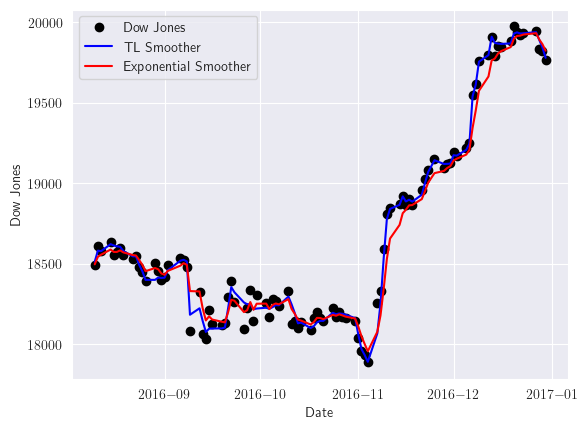

In [59]:
plt.plot(djia_ts.index[-last_fc:], djia_ts[-last_fc:], marker='o', linestyle='', color='black', label='Dow Jones')
plt.plot(djia_ts.index[-last_fc:], out_tl_dji[-last_fc:, 0], color='blue', label='TL Smoother')
plt.plot(djia_ts.index[-last_fc:], dji_smooth1[-last_fc:], color='red', label='Exponential Smoother')
plt.xlabel('Date')
plt.ylabel('Dow Jones')
plt.legend()
plt.show()

## Evaluación del modelo

- Si el modelo de pronóstico funciona como se esperaba, ***los errores de pronóstico deberían no exhibir ningún patrón o estructura***; es decir, no deberían estar correlacionados. Por lo tanto, siempre es una buena idea verificar esto. Puede hacerlo calculando el ***ACF muestral de los errores de pronóstico*** de

$$
r_{k}=\frac{\displaystyle{\sum_{t=k}^{T-1}[e_{t}(1)-\overline{e}][e_{t-k}(1)-\overline{e}]}}{\displaystyle{\sum_{T=0}^{T-1}[e_{t}(1)-\overline{e}]^{2}}},~\text{donde}~\overline{e}=\frac{1}{n}\sum_{t=1}^{T}e_{t}(1).
$$

````{admonition} Observación
:class: tip

- Si los ***errores de pronóstico*** de un paso adelante en realidad ***no están correlacionados***, las ***autocorrelaciones muestrales para cualquier rezago*** $k$ ***deben estar alrededor de 0*** con un error estándar $1/\sqrt{T}$.

- De ahí una ***autocorrelación muestral*** para cualquier rezago $k$ que se encuentre ***fuera de los límites*** $\pm2/\sqrt{T}$ ***requerirán una mayor investigación del modelo***.
````

## Suavización exponencial para datos estacionales

- Algunos datos de series de tiempo exhiben ***patrones cíclicos o estacionales*** que no se pueden modelar efectivamente utilizando el modelo polinómico de la Ecuación {eq}`highorder_exponential_smoothing`. Hay varios enfoques disponibles para el análisis de dichos datos. 

- La metodología en la que nos centraremos fue introducida originalmente por {cite}`holt2004forecasting` y {cite}`winters1960forecasting` y generalmente se conoce como ***método de Winters***, donde se realiza un ajuste estacional al modelo de tendencia lineal.

### Modelo estacional aditivo

- Para el caso del ***modelo estacional aditivo***, asumiremos que la serie temporal estacional se puede representar mediante el siguiente modelo:

    $$
    y_{t}=L_{t}+S_{t}+\varepsilon_{t},
    $$(additive_stational_model)

    donde $L_{t}$ representa el nivel o ***componente de tendencia lineal*** y puede a su vez ser representado por $\beta_{0}+\beta_{1}t$; $S_{t}$ representa el ***ajuste estacional*** con $S_{t}=S_{t+s}=S_{t+2s}=\cdots$ para $t=1, 2,\cdots, s-1$ donde $s$ ***es la longitud de período (estación) de los ciclos***; y suponemos que $\varepsilon_{t}$ es ***no correlacionado con media o y varianza constante*** $\sigma_{\varepsilon}^{2}$.

- Una *restricción habitual* de este modelo es que los ***ajustes estacionales suman cero durante un periodo*** (*evitar tendencia acumulativa en los ajustes estacionales*),

$$
\sum_{t=1}^{s}S_{t}=0.
$$

- En el modelo dado en la Ecuación {eq}`additive_stational_model`, para pronosticar las observaciones futuras, emplearemos ***suavizadores exponenciales de primer orden con diferentes factores de descuento***.

- El procedimiento para actualizar las estimaciones de los parámetros una vez que se obtiene la observación actual $y_{T}$ es el siguiente.

1. Actualizar la estimación de $L_{t}$ usando

    $$
    \hat{L}_{t}=\lambda_{1}(y_{T}-\hat{S}_{T-s})+(1-\lambda_{1})(\hat{L}_{T-1}+\hat{\beta}_{1, T-1}),
    $$(LT_estimation)

    donde $0<\lambda_{1}<1$. Cabe señalar que en la Ecuación {eq}`LT_estimation`, la primera parte puede verse como el valor "actual" de $L_{T}$ y la segunda parte como el pronóstico de $L_{T}$ basado en las estimaciones en $T-1$.

2. Actualizar la estimación de $\beta_{1}$ usando

   $$
   \hat{\beta}_{1, T}=\lambda_{2}(\hat{L}_{T}-\hat{L}_{T-1})+(1-\lambda_{2})\hat{\beta}_{1, T-1},
   $$(beta1T_additive_seasonal_model)

   donde $0<\lambda_{2}<1$. Como en el Paso 1, la estimación de $\beta_{1}$ en la Ecuación {eq}`beta1T_additive_seasonal_model` puede verse como la combinación lineal del actual valor de $\beta_{1}$ y su pronóstico an el tiempo $T-1$.

3. Actualizar la estimación de $S_{t}$ usando

   $$
   \hat{S}_{T}=\lambda_{3}(y_{T}-\hat{L}_{T})+(1-\lambda_{3})\hat{S}_{T-s},
   $$(seasonal_forecast_additive_model)

   donde $0<\lambda_{3}<1$.

4. Finalmente, el pronóstico $\tau$ pasos hacia adelante, $\hat{y}_{T+\tau}(T)$, es

   $$
   \hat{y}_{T+\tau}(T)=\hat{L}_{T}+\hat{\beta}_{1, T}\tau+\hat{S}_{T}(\tau-s).
   $$

- ***Estimar los valores iniciales de una suavización exponencial es crucial***. Para un conjunto dado de datos históricos con $n$ estaciones ($ns$ observaciones), podemos usar las ***estimaciones de mínimos cuadrados*** del siguiente modelo:

  $$
  y_{t}=\beta_{0}+\beta_{1}t+\sum_{i=1}^{s-1}\gamma_{i}(I_{t, i}-I_{t, s})+\varepsilon_{t},
  $$(ols_estimation_additive_model)

  donde

  $$
  I_{t, i}=
  \begin{cases}
  1, & t=i, i+s, i+2s, \dots\\
  0, & \text{en otro caso}.
  \end{cases}
  $$

- Las ***estimaciones de mínimos cuadrados de los parámetros*** de la Ecuación {eq}`ols_estimation_additive_model` se utilizan para obtener los valores iniciales como

$$
\begin{align*}
\hat{\beta}_{0, 0} &= \hat{L}_{0}=\hat{\beta}_{0}\\
\hat{\beta}_{1, 0} &= \hat{\beta}_{1}\\
\hat{S}_{j-s} &= \hat{Y}_{j},~\text{para}~ 1\leq j\leq s-1\\
\hat{S}_{0} &= -\sum_{j=1}^{s-1}\hat{y}_{j}.
\end{align*}
$$

- Estos son valores iniciales de los parámetros del modelo en el origen original de tiempo, $t = 0$. Para realizar pronósticos desde el origen correcto de tiempo, la componente permanente debe trasladarse al tiempo $T$ calculando $\hat{L}_{T}=\hat{L}_{0}+ns\hat{\beta}_{1}$. Alternativamente, se podrían suavizar los parámetros usando las Ecuaciones {eq}`LT_estimation`-{eq}`seasonal_forecast_additive_model` para periodos de tiempo $t = 1, 2,\dots, T$ {cite}`hyndman2008forecasting`.

````{admonition} Observación
:class: tip

- Intervalos de predicción como en el caso del suavizado no estacional, requerirían ***estimación de la varianza del error de predicción***. El enfoque más común es utilizar la ***relación entre las técnicas de suavizado exponencial y modelos ARIMA*** que abordaremos en el siguiente capítulo, y estimar la variación del error de predicción acordemente.
````

### Modelo estacional multiplicativo

- Si la ***amplitud del patrón estacional es proporcional al nivel medio de la serie temporal estacional***, el siguiente modelo estacional multiplicativo será el más adecuado

  $$
  y_{t}=L_{t}S_{t}+\varepsilon_{t},
  $$(multiplicative_stational_model)

  donde $L_{t}$ una vez más representa la componente permanente (i.e. $\beta_{0}+\beta_{1}t$); $S_{t}$ representa el ajuste estacional con $S_{t}=S_{t+s}=S_{t+2s}=\cdots$ para $t=1,2,\dots, s-1$, donde $s$ es la longitud del periodo de los ciclos; y $\varepsilon_{t}$ se supone no correlacionado con media 0 y varianza constante $\sigma_{\varepsilon}^{2}$.

- La restricción para los ajustes estacionales en este caso se convierte en

  $$
  \sum_{t}^{s}S_{t}=s.
  $$

- Como en el modelo aditivo, emplearemos tres suavizadores exponenciales para estimar los parámetros en la Ecuación {eq}`multiplicative_stational_model`

1. Actualizar el estimador de $L_{T}$ usando

   $$
   \hat{L}_{T}=\lambda_{1}\frac{y_{T}}{\hat{S}_{T-s}}+(1-\lambda_{1})(\hat{L}_{T-1}+\hat{\beta}_{1, T-1}), 
   $$

   donde $0<\lambda_{1}<1$.

2. Actualizar el estimador de $\beta_{1}$ utilizando

   $$
   \hat{\beta}_{1, T}=\lambda_{2}(\hat{L}_{T}-\hat{L}_{T-1})+(1-\lambda_{2})\hat{\beta}_{1, T-1},
   $$

   donde $0<\lambda<1$.

3. Actualizar la estimación de $S_{t}$ usando

   $$
   \hat{S}_{T}=\lambda_{3}\frac{y_{T}}{\hat{L}_{T}}+(1-\lambda_{3})\hat{S}_{T-s},
   $$

   donde $0<\lambda_{3}<1$.

4. El pronóstico $\tau$ pasos hacia adelante, $\hat{y}_{T+\tau}(T)$, es

   $$
   \hat{y}_{T+\tau}(T)=(\hat{L}_{T}+\hat{\beta}_{1, T}\tau)\hat{S}_{T}(\tau-s).
   $$

- Supongamos que un registro que consta de $n$ estaciones de datos es disponible. De este conjunto de datos históricos, los valores iniciales, $\hat{\beta}_{0, 0}, \hat{\beta}_{1, 0}$ y $\hat{S}_{0}$, se puede calcular como

  $$
  \hat{\beta}_{0, 0}=\hat{L}_{0}=\frac{\overline{y}_{n}-\overline{y}_{1}}{(n-1)s},
  $$

  donde

  $$
  \overline{y}_{i}=\frac{1}{s}\sum_{t=(i-1)s+1}^{is}y_{t}
  $$

  y

  $$
  \begin{align*}
  \hat{\beta}_{1, 0} &= \overline{y}_{1}-\frac{s}{2}\hat{\beta}_{0, 0}\\
  \hat{S}_{j-s} &= s\frac{\hat{S}_{j}^{\star}}{\sum_{i=1}^{s}\hat{S}_{i}^{\star}}~\text{para}~1\leq j\leq s, 
  \end{align*}
  $$

  donde

  $$
  \hat{S}_{j}^{\star}=\frac{1}{n}\sum_{t=1}^{n}\frac{y_{(t-1)s+j}}{\overline{y}_{t}-((s+1)/2-j)\hat{\beta}_{0}}.
  $$

  Para más detalles ver {cite}`montgomery1990forecasting` y {cite}`abraham2009statistical`.

## Librería `statsmodels.tsa.holtwinters`

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

- Consideremos, nuevamente, el objetivo de estimar la cantidad de ***contaminación atmosférica** por dióxido de carbono a partir de muestras continuas de aire en el ***Observatorio Mauna Loa, Hawai, EE. UU.*** Período de registro: ***marzo de 1958 - diciembre de 2001***.

In [61]:
data = sm.datasets.co2.load_pandas()
y = data.data
y.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [62]:
y = y['co2'].resample('MS').mean()
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [63]:
y.isnull().sum()

5

In [64]:
y = y.fillna(y.bfill())
y.isnull().sum()

0

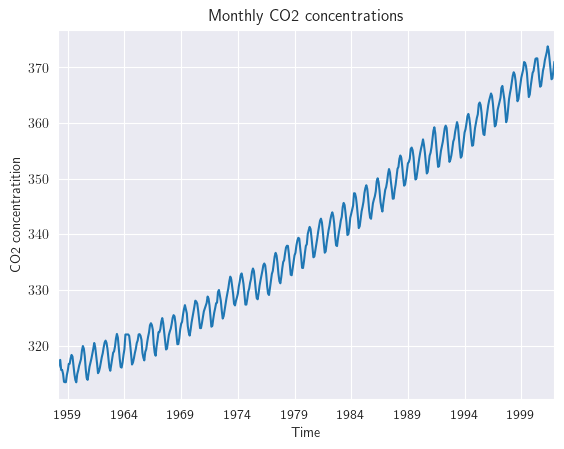

In [65]:
y.plot()
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition');
plt.show()

- Dividimos en esta ocasión nuestro dataset en conjunto de ***entrenamiento*** y de ***prueba***. En este caso ***el conjunto de prueba corresponde a los últimos 48 meses***

In [66]:
tau_test = 48
train = y[:-tau_test]
test  = y[-tau_test:]
print((len(train), len(test)))

(478, 48)


- La siguiente función nos permitirá ***graficar los conjuntos de entrenamiento, prueba y las respectivas predicciones*** del conjunto de prueba. Además, mostraremos en el título de estas figuras la métrica `MAE`

In [67]:
def plot_model(train, test, y_pred, title):
    
    mae = mean_absolute_error(test, y_pred)
    train[-112:].plot(legend=True, label="Train", title=f"{title}, MAE: {round(mae, 2)}")
    test.plot(legend=True, label="Test")
    y_pred.plot(legend=True, label="Prediction")
    plt.show()

### Simple Exponential Smoothing

- Cada una de las ***funciones optimizadoras permitirán encontrar el mejor parámetro*** $\alpha$ para obtener aquel modelo que minimiza en este caso la métrica `MAE`

In [68]:
def ses_optimizer(train, alphas, step):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

    return best_alpha, best_mae

In [69]:
def ses_model_tuning(train , test, step, title="Model Tuning - Single Exponential Smoothing"):
    
    alphas = np.arange(0.8, 1, 0.01)
    best_alpha, best_mae = ses_optimizer(train, alphas, step=step)
    final_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha, optimized=False)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    plot_model(train, test, y_pred, title)

- Observemos las ***predicciones*** obtenidas por medio del ***modelo de suavización exponencial simple***

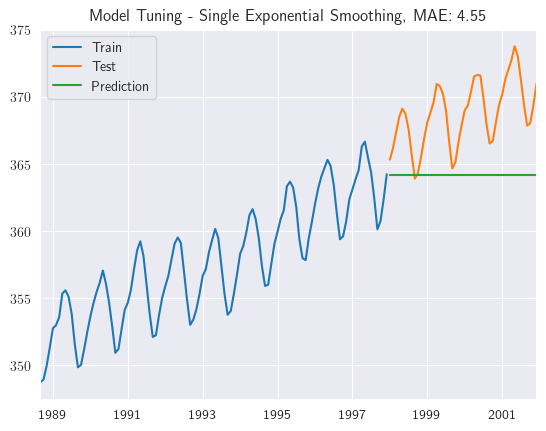

In [70]:
ses_model_tuning(train, test, step=tau_test)

### Double Exponential Smoothing

- `ExponentialSmoothing(train, trend=trend)`: Crea una instancia de un modelo de suavización exponencial. Toma como argumento la serie temporal de entrenamiento `train` y especifica el ***tipo de tendencia (lineal o exponencial)*** mediante el parámetro `trend`.

- `.fit(smoothing_level=alpha, smoothing_slope=beta)`: Ajusta el modelo a los datos de entrenamiento. Los parámetros `smoothing_level` y `smoothing_slope` ***controlan el nivel de suavizado de la serie temporal y de la tendencia***, respectivamente. Estos parámetros se establecen en los valores dados por `alpha` y `beta`.

In [71]:
def des_optimizer(train, alphas, betas, trend, step):

    best_alpha, best_beta, best_mae = None, None, float("inf")

    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend=trend).fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae

    return best_alpha, best_beta, best_mae

In [72]:
def des_model_tuning(train , test, step, trend, title="Model Tuning - Double Exponential Smoothing"):
    
    alphas = np.arange(0.01, 1, 0.10)
    betas = np.arange(0.01, 1, 0.10)
    best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, trend=trend, step=step)
    final_model = ExponentialSmoothing(train, trend=trend).fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    
    plot_model(train, test, y_pred, title)

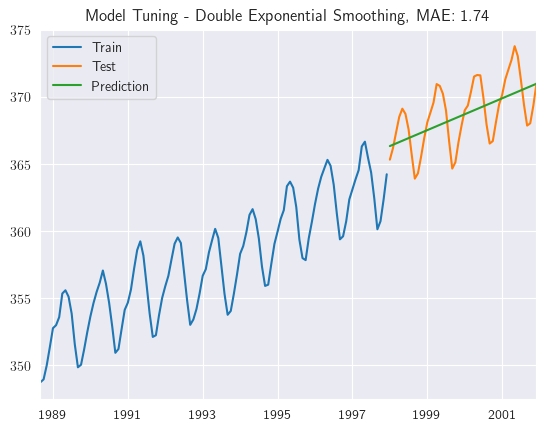

In [73]:
des_model_tuning(train, test, step=tau_test, trend='add')

### Triple Exponential Smoothing

- En `ExponentialSmoothing` de la biblioteca `statsmodels` se especifican los ***componentes del modelo, como la tendencia y la estacionalidad***, utilizando los argumentos `trend` y `seasonal`.

- Se especifica el ***número de periodos estacionales*** utilizando el argumento `seasonal_periods`. Los parámetros de suavizado (`smoothing_level, smoothing_slope` y `smoothing_seasonal`) se establecen en los valores proporcionados en la lista `comb`.

In [74]:
def tes_optimizer(train, abg, trend, seasonal,  seasonal_periods, step):
    
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae

    return best_alpha, best_beta, best_gamma, best_mae

In [75]:
def tes_model_tuning(train , test, step, trend, seasonal, seasonal_periods, title="Model Tuning - Triple Exponential Smoothing"):
    
    alphas = betas = gammas = np.arange(0.10, 1, 0.10)
    abg = list(itertools.product(alphas, betas, gammas))
    best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg=abg, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods, step=step)
    final_model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal).fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)
    y_pred = final_model.forecast(step)
    mae = mean_absolute_error(test, y_pred)
    plot_model(train, test, y_pred, title)
    
    return best_alpha, best_beta, best_gamma, best_mae

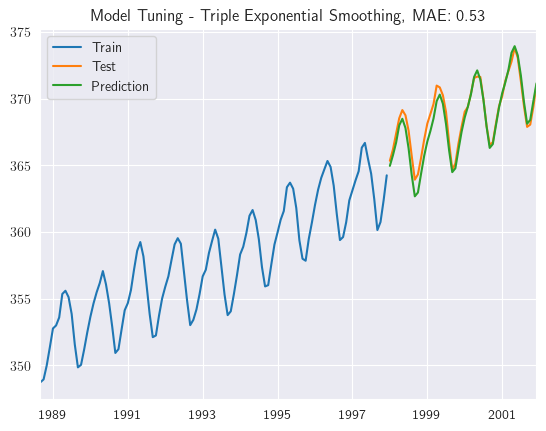

In [76]:
best_alpha, best_beta, best_gamma, best_mae = tes_model_tuning(train, test, step=tau_test, trend='add', seasonal='add', seasonal_periods=12)

- Realizamos ahora ***predicciones para datos fuera de la muestra***, en este caso pronosticamos un ***horizonte de 12 meses*** de `CO2`

In [77]:
def tes_final_model(y, best_alpha, best_beta, best_gamma, step, trend='add', seasonal='add'):
  final_model = ExponentialSmoothing(y, trend=trend, seasonal=seasonal).fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)
  feature_predict = final_model.forecast(step)
  return feature_predict

In [78]:
y_pred = tes_final_model(y, best_alpha, best_beta, best_gamma, step=12)

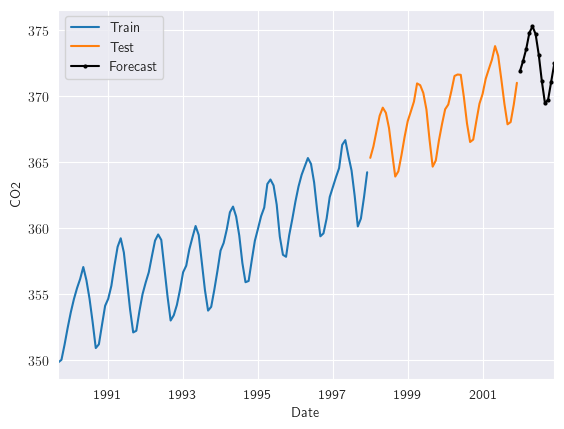

In [79]:
train[-100:].plot(label = 'Train');
test.plot(label = 'Test');
y_pred.plot(label = 'Forecast', color = 'black', marker='o', markersize=2);
plt.xlabel('Date')
plt.ylabel('CO2')
plt.legend();

````{admonition} Resumen
:class: tip

- Este capítulo trata de los enfoques de suavización exponencial para datos de series temporales. Los enfoques pueden ampliarse fácilmente para la predicción mediante la inclusión de términos como el ***factor de suavización, factor de tendencia y factor de estacionalidad***. 

- El suavizado exponencial de orden único realiza la suavización utilizando solo el factor $\lambda$, que se amplía con los factores $\alpha,\,\beta$ de segundo orden al incluir tendencia. ***La suavización de tercer orden incorpora todos los factores, tendencia y estacionalidad en el modelo***.

- En este capítulo se han tratado todos estos modelos en detalle con su implementación en ***Python***. El enfoque de ***suavizado exponencial puede utilizarse para pronosticar series temporales estacionarias***. Sin embargo, esta suposición puede no ser cierta. ***Se recomienda el suavizado exponencial de orden superior para estos casos***, pero su cálculo es difícil y costoso computacionalmente. Por lo tanto, para hacer frente a este planteamiento, ***se utilizan otras técnicas de previsión como el modelo ARIMA, que se tratará en la siguiente sección***.

````